## Zomato Stock Prediction - Punjay Divekar

### Introduction

Zomato, a global restaurant discovery and food delivery platform, has gained significant attention in the stock market since its public listing. Like many technology companies, Zomato's stock price is influenced by a variety of factors, such as market sentiment, global economic conditions, company performance, and investor behavior. Predicting stock prices is inherently challenging due to the high volatility and complex, non-linear relationships in the data. Traditional statistical models, often struggle to capture these dynamics, especially when external factors and multivariate data come into play.

Machine learning (ML) models, on the other hand, offer powerful tools for analyzing such complex patterns. By leveraging multivariate data (e.g., historical prices, technical indicators, and engineered features), ML algorithms can better capture non-linear relationships and long-term dependencies, making them more suited for stock price prediction. These models help provide investors with more accurate forecasts, aiding in decision-making amidst the unpredictable nature of financial markets.


### 1. Exploratory Data Analysis (EDA)
In this notebook we will do Exploratory Data Analysis following the steps:

* Check for missing values
* Check data types
* Summary statistics
* Visualizing the stock's behavior over time

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the dataset
file_path = 'zomatodata.csv'
data = pd.read_csv(file_path)

###  Initial Data Inspection

In [4]:
# Check for missing values and data types
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           746 non-null    object 
 1   series         746 non-null    object 
 2   OPEN           746 non-null    float64
 3   HIGH           746 non-null    float64
 4   LOW            746 non-null    float64
 5   PREV. CLOSE    746 non-null    float64
 6   ltp            746 non-null    float64
 7   close          746 non-null    float64
 8   vwap           746 non-null    float64
 9   52W H          746 non-null    float64
 10  52W L          746 non-null    float64
 11  VOLUME         746 non-null    object 
 12  VALUE          746 non-null    object 
 13  No of trades   746 non-null    object 
dtypes: float64(9), object(5)
memory usage: 81.7+ KB
None


In [8]:
# Check for missing values in each column
print("\nMissing values per column:")
print(data.isna().sum())


Missing values per column:
Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64


In [10]:
# Display summary statistics of numeric columns
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
            OPEN        HIGH         LOW   PREV. CLOSE         ltp   \
count  746.000000  746.000000  746.000000    746.000000  746.000000   
mean   104.550067  106.624155  102.082507    104.093901  104.307466   
std     46.163911   46.929357   45.104441     45.994207   46.203310   
min     40.850000   44.400000   40.600000     41.650000   41.600000   
25%     63.675000   64.900000   62.400000     63.450000   63.350000   
50%     92.375000   94.475000   90.075000     91.075000   91.475000   
75%    137.037500  139.187500  133.300000    136.600000  136.775000   
max    230.000000  232.000000  225.000000    229.150000  229.250000   

           close        vwap       52W H       52W L   
count  746.000000  746.000000  746.000000  746.000000  
mean   104.286005  104.362574  146.878807   60.904759  
std     46.175634   46.095104   37.739615   27.048676  
min     41.650000   43.290000   75.450000   40.600000  
25%     63.450000   63.552500  115.100000   40.600000  
50%

In [12]:
# Display the columns of the dataset
print("\nColumn names:")
print(data.columns)


Column names:
Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')


###  Data Cleaning

In [15]:
# Fix the ' Date ' column name by stripping any extra spaces
data.rename(columns=lambda x: x.strip(), inplace=True)

In [17]:
# Convert the 'Date' column to datetime format for time series analysis
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

###  Visualizations

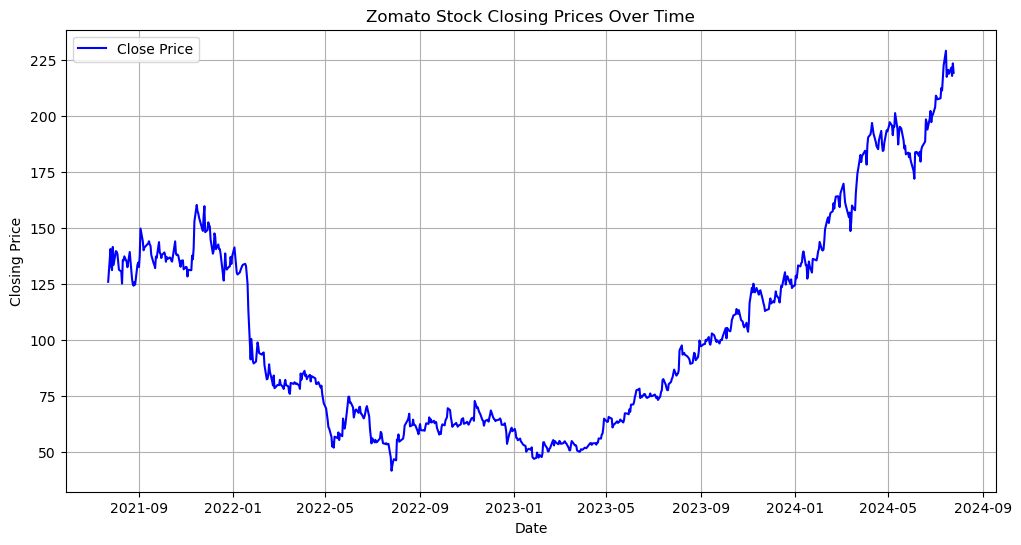

In [20]:
# Visualize the closing prices over time
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['close'], label='Close Price', color='blue')
plt.title('Zomato Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


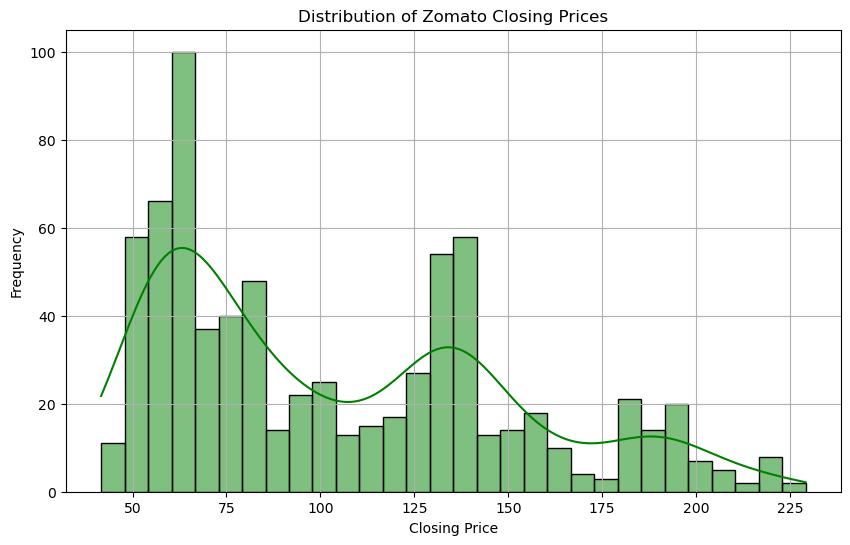

In [22]:
# Step 4: Distribution of the closing price
plt.figure(figsize=(10,6))
sns.histplot(data['close'], kde=True, bins=30, color='green')
plt.title('Distribution of Zomato Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

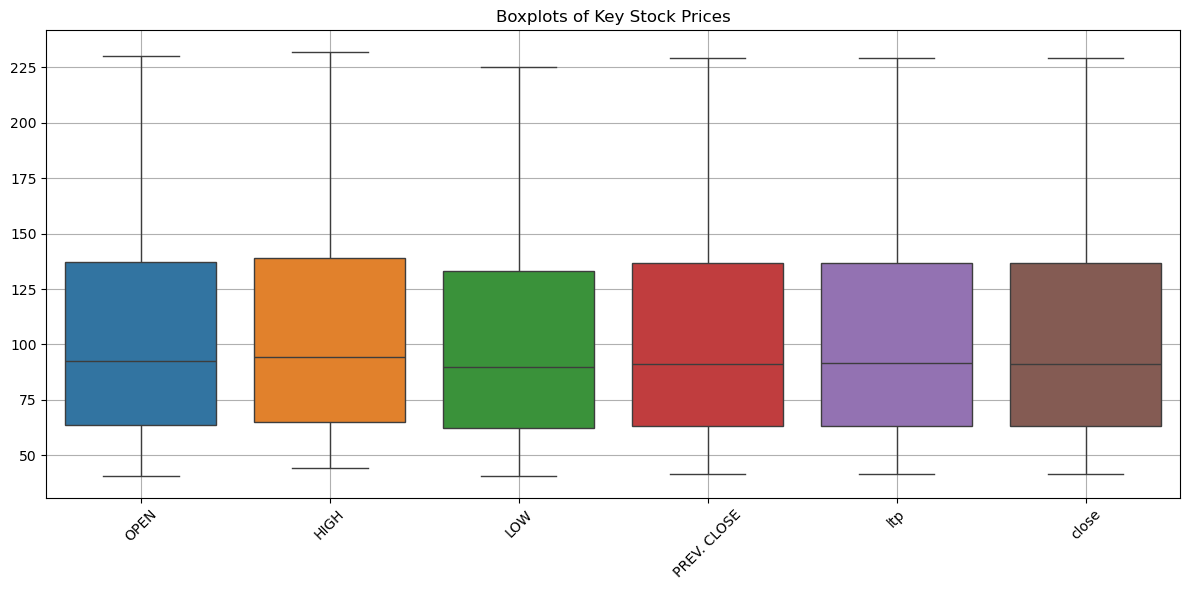

In [24]:
# Step 5: Boxplots for continuous variables
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close']])
plt.title('Boxplots of Key Stock Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

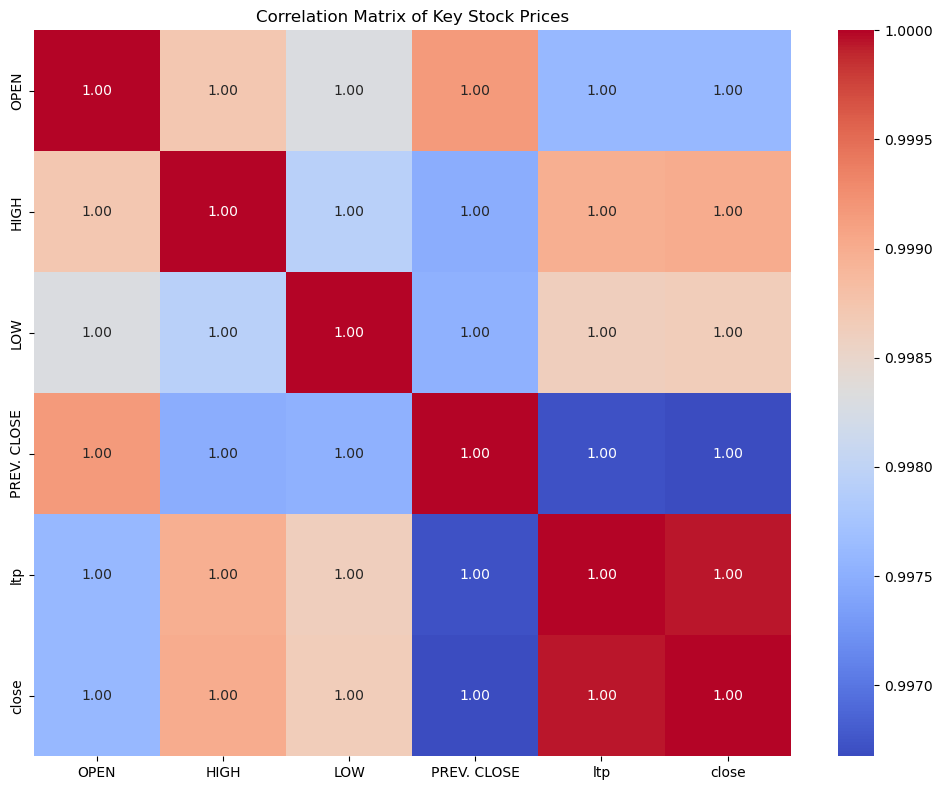

In [26]:
# Step 6: Correlation Matrix
plt.figure(figsize=(10,8))
corr_matrix = data[['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Stock Prices')
plt.tight_layout()
plt.show()

## 2. Data Cleaning and Feature Engineering
Since this is time series data, we will create additional features such as day of the week, month, and rolling averages to give the model more context. And also handle any missing values or data issues.

### Handle Missing Data

In [30]:
# Forward-fill missing values to avoid data gaps in time series
data.ffill(inplace=True)

### Feature Engineering - Adding Time-Based Features

In [33]:
# Extract day of the week from 'Date' (0 = Monday, 6 = Sunday)
data['day_of_week'] = data['Date'].dt.dayofweek

In [35]:
# Extract month from 'Date'
data['month'] = data['Date'].dt.month

### Rolling Averages for Smoothing
Create rolling averages to capture short and long-term trends in the closing price

In [38]:
# 5-day rolling average of the 'close' price
data['rolling_mean_5'] = data['close'].rolling(window=5, min_periods=1).mean()


In [40]:
# 20-day rolling average of the 'close' price
data['rolling_mean_20'] = data['close'].rolling(window=20, min_periods=1).mean()

In [42]:
# Step 4: Inspect the new features added to the dataset
print("\nUpdated data with new features:")
print(data[['Date', 'close', 'day_of_week', 'month', 'rolling_mean_5', 'rolling_mean_20']].head())



Updated data with new features:
        Date   close  day_of_week  month  rolling_mean_5  rolling_mean_20
0 2024-07-25  219.31            3      7      219.310000       219.310000
1 2024-07-24  223.49            2      7      221.400000       221.400000
2 2024-07-23  217.91            1      7      220.236667       220.236667
3 2024-07-22  221.66            0      7      220.592500       220.592500
4 2024-07-19  218.89            4      7      220.252000       220.252000


3. Building Machine Learning Models to Predict Stock Prices
I will use various machine learning models to predict the stock prices (using the 'close' column as the target). Models will include:

* Linear Regression
* Random Forest
* XGBoost
* LSTM (for time series forecasting)
* ARIMA (a classical time series model)

In [45]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Prepare the dataset for modeling

In [48]:
# Features (X) and target variable (y)
X = data[['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'vwap', 'day_of_week', 'month', 'rolling_mean_5', 'rolling_mean_20']].fillna(0)
y = data['close']


In [50]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
### XGBoost Model with updated metrics
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [54]:
# Predictions on test set
y_pred_xgb = xgb.predict(X_test)

In [56]:
# Evaluate the XGBoost model performance
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)  # Updated to use 'squared=False' to avoid the warning
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R2 Score: {r2_xgb}")

XGBoost RMSE: 1.5196598950464035
XGBoost R2 Score: 0.9989762539929479


In [58]:
### Visualize actual vs predicted stock prices

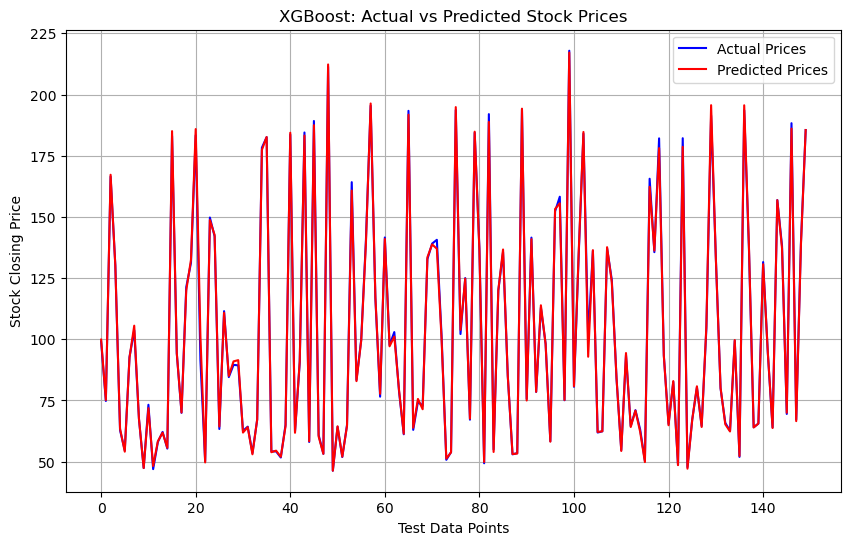

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_xgb, label='Predicted Prices', color='red')
plt.title('XGBoost: Actual vs Predicted Stock Prices')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
### Cross-Validation to improve model generalization

In [64]:
# Perform cross-validation on the XGBoost model and calculate RMSE
cv_scores_xgb = cross_val_score(xgb, X, y, cv=5, scoring='neg_root_mean_squared_error')

In [65]:
# Print the cross-validation RMSE score (taking the mean of the 5 folds)
print(f"XGBoost Cross-Validation RMSE: {np.mean(-cv_scores_xgb)}")


XGBoost Cross-Validation RMSE: 7.668325756796745


## 4. Time Series Models (ARIMA, LSTM)¶
* ARIMA (AutoRegressive Integrated Moving Average): A classical time-series model that can handle both trend and seasonality in the data.
* LSTM (Long Short-Term Memory): A neural network-based model well-suited for time-series forecasting.

### ARIMA Model
The ARIMA model is ideal for univariate time series data, and I will apply it to the 'close' price to predict future prices.

In [70]:
# Import necessary libraries
#!pip install pmdarima
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [71]:
# Prepare the data for ARIMA
# Use only the 'close' column for univariate time series prediction
close_prices = data['close'].values

In [74]:
# Split into train and test set
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

In [76]:
# Fit the ARIMA model
arima_model = ARIMA(train, order=(5,1,0))  # (p,d,q) order: AR(5), I(1), MA(0)
arima_model_fit = arima_model.fit()

In [78]:
# Make predictions on the test set
predicted_prices_arima = arima_model_fit.forecast(steps=len(test))

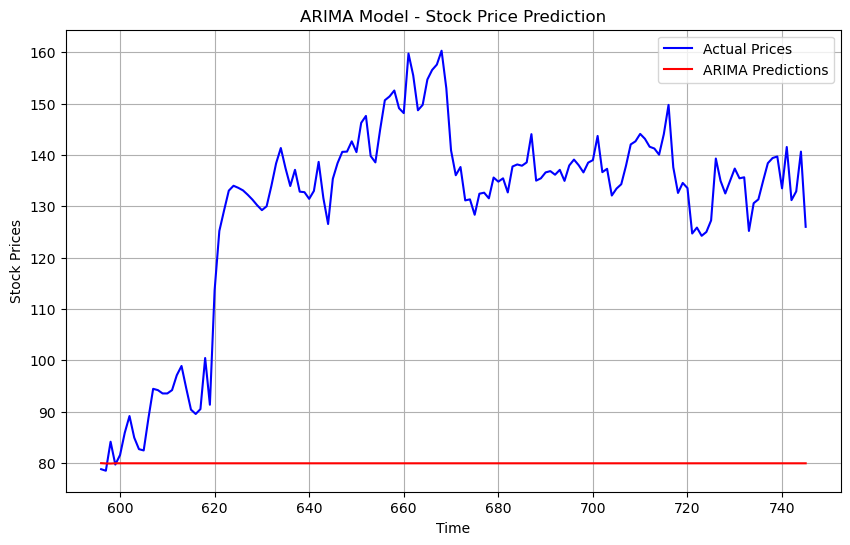

In [80]:
# Plot the predictions against actual prices
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Actual Prices', color='blue')
plt.plot(np.arange(len(train), len(train) + len(test)), predicted_prices_arima, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model - Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
# Calculate RMSE for ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test, predicted_prices_arima))
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 53.449240719105084


## Considerations on this model

The ARIMA model is giving a high RMSE, which suggests that it’s not capturing the stock price patterns well. Let's break down why ARIMA may not be a good fit for this data and what alternatives can improve the accuracy.

* Why ARIMA may not work well for this data:
Univariate Time Series: ARIMA is a univariate model, which means it only considers the close prices for predictions. However, stock prices are influenced by many other factors (e.g., volume, opening prices, high/low, and external market factors). A model that only considers one variable may miss important information.

* High Variability and Volatility: Stock prices tend to be highly volatile, which makes ARIMA’s assumptions (linear relationships, stationary data) less suited for stock forecasting. If your data is not stationary (trends or seasonality), ARIMA might struggle.

* Lack of Feature Engineering: The ARIMA model is only considering historical close prices. In comparison, more advanced models like XGBoost or LSTM can handle additional features like rolling averages, day of the week, and volume, providing more context for the prediction.

* How to Improve:
Use more features: We could try adding features (like rolling averages, day of the week, and other engineered features) into a multivariate time-series model, such as SARIMAX, which allows for multiple input variables.

* Alternatives to ARIMA:

* LSTM (Long Short-Term Memory): This is a neural network-based model designed to capture long-term dependencies in time-series data. It is better suited for highly variable and complex time series like stock prices.
Prophet (Facebook): A model developed by Facebook that handles time series data with non-linear trends and seasonality, often used for business forecasts.

In the present project we will try a hybrid approach: Combine ARIMA with a machine learning model like XGBoost to capture linear and non-linear relationships. Let's tweak the ARIMA model slightly for improvements and then move to LTSM

### Check for Stationarity
We will first check if the data is stationary, as ARIMA requires a stationary time serieS

In [87]:
# Import necessary libraries
from statsmodels.tsa.stattools import adfuller

In [89]:
# Augmented Dickey-Fuller test
adf_test = adfuller(train)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
# If the p-value is > 0.05, we fail to reject the null hypothesis (the data is not stationary)

ADF Statistic: -2.9249222165902977
p-value: 0.04252569360691781


In [91]:
# Differencing (if necessary)
# If the data is not stationary, we may apply differencing
train_diff = np.diff(train)

In [93]:
# Fit ARIMA with Differenced Data
arima_model = ARIMA(train_diff, order=(5,1,0))  # Adjusting (p,d,q) if needed
arima_model_fit = arima_model.fit()

In [95]:
# Make Predictions on the Test Set
predicted_prices_arima = arima_model_fit.forecast(steps=len(test))

In [97]:
# Since we applied differencing, we need to reverse the differencing to get actual predictions
predicted_prices_arima = np.r_[train[-1], predicted_prices_arima].cumsum()  # Reverse differencing

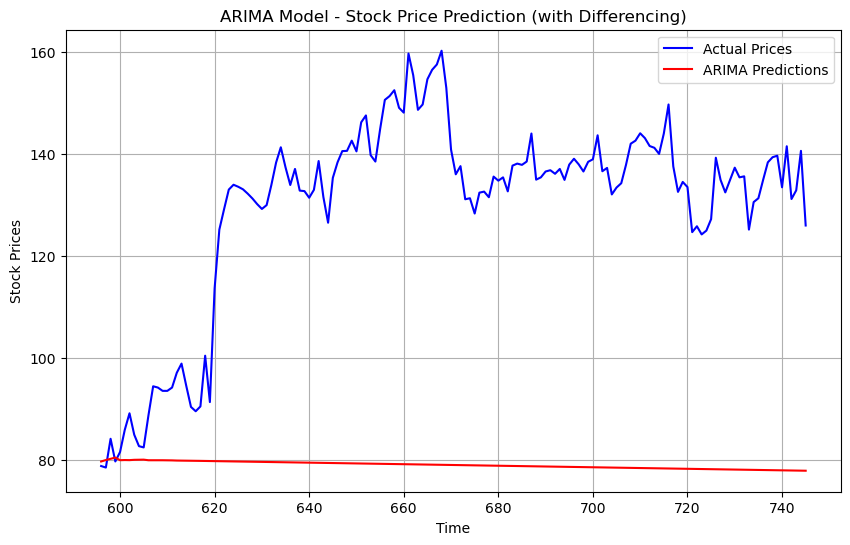

In [99]:
# Plot the predictions against actual prices
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='Actual Prices', color='blue')
plt.plot(np.arange(len(train), len(train) + len(test)), predicted_prices_arima[1:], label='ARIMA Predictions', color='red')
plt.title('ARIMA Model - Stock Price Prediction (with Differencing)')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
#  Calculate RMSE for ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test, predicted_prices_arima[1:]))  # Ignore the first differenced value
print(f"ARIMA RMSE (with Differencing): {arima_rmse}")

ARIMA RMSE (with Differencing): 54.466297153319196



* Stationarity Test: We first perform the Augmented Dickey-Fuller test to check whether the data is stationary. If it’s not, ARIMA will struggle, so we apply differencing to make the data stationary.

* Differencing: By differencing, we remove the trend from the time series and make the data more suitable for ARIMA. After predictions, we reverse the differencing to get back the original scale.

* Improving ARIMA: All our efforts didn't make any difference in improving the models, ARIMA still struggles with stock prices because of high volatility and limited feature consideration.


## LSTM

* Handles Sequential Data: LSTM is designed for sequential data, making it better suited for time-series predictions.
* Captures Long-term Dependencies: LSTM can remember patterns from long sequences, which is critical for forecasting stock prices.
* Multivariate Capability: LSTM can handle multiple input features, such as those we've already engineered (rolling averages, day of the week, etc.).

## Steps:
1. Data Preparation: We need to format the data as sequences (X, y) that the LSTM model expects.
2. Build the LSTM Model: We'll use Keras to build a neural network with LSTM layers.
3. Train and Evaluate: Train the LSTM model and evaluate its performance using RMSE and visualizations.
4. Comparison: We'll compare the LSTM predictions with actual stock prices.

In [105]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

### Data Preparation

In [107]:
# We'll scale the data for LSTM, which typically performs better with normalized inputs
scaler = MinMaxScaler(feature_range=(0, 1))

In [108]:
# Select the 'close' prices for LSTM (you can include more features if needed)
scaled_data = scaler.fit_transform(data[['close']])


In [109]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [110]:
# Define the sequence length (how many previous time steps to use for prediction)
sequence_length = 60  # Example: 60 days of data to predict the next day's price

In [111]:
# Create the sequences
X, y = create_sequences(scaled_data, sequence_length)

In [112]:
# Split into training and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [113]:
# Reshape input to be 3D for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [114]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer to predict the next stock price
model.compile(optimizer='adam', loss='mean_squared_error')

In [118]:
#  Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0377
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3522e-04
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3732e-04
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.4506e-04
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.6505e-04
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.8845e-04
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.6376e-04


In [125]:
### Make Predictions and Evaluate the Model

# Predicting the test set stock prices
predicted_prices_lstm = model.predict(X_test)

# Inverse the scaling of the predicted data
predicted_prices_lstm = scaler.inverse_transform(predicted_prices_lstm)

# Inverse the scaling of the actual test data for comparison
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_prices_lstm))
print(f"LSTM RMSE: {lstm_rmse}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
LSTM RMSE: 11.577609995840508


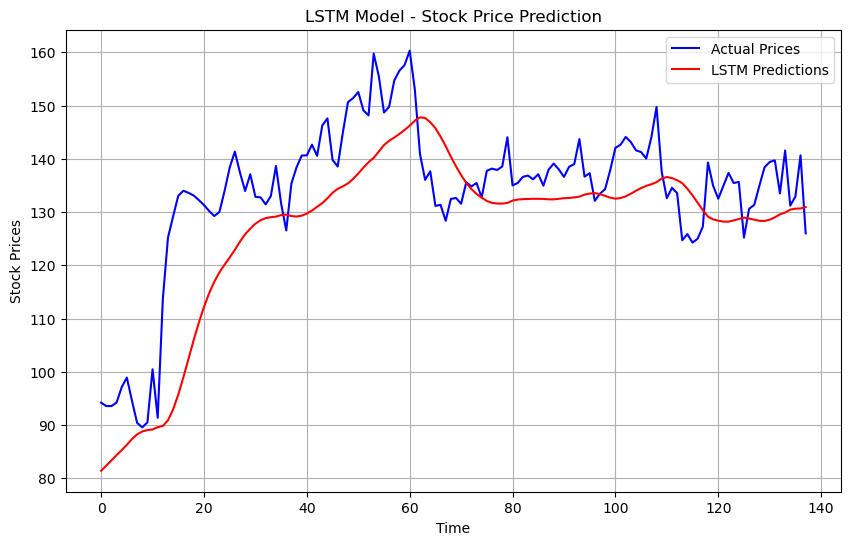

In [126]:
# Step 5: Visualize the results
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predicted_prices_lstm, label='LSTM Predictions', color='red')
plt.title('LSTM Model - Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


### Discussion

* Data Scaling: LSTM models work better with normalized data, so we scale the close prices to values between 0 and 1 using MinMaxScaler.

* Create Sequences: LSTM requires sequential data, so we convert the stock prices into sequences of 60 days to predict the next day’s price. You can adjust the sequence length as needed.

### LSTM Model:

* The model consists of two LSTM layers followed by a Dense layer to output the predicted price.
* We use adam optimizer and mean_squared_error loss function to train the model.

### Prediction and Evaluation:

* After training the model, we make predictions on the test set.
* The results are scaled back to the original price values for comparison, and we calculate the RMSE for evaluation.
* Visualization: We plot the actual vs predicted stock prices to visualize how well the LSTM model is capturing the trends.

Why LSTM Works Better:
* LSTM can learn long-term dependencies, which is crucial for time-series data like stock prices.
* Unlike ARIMA, LSTM can handle non-linear relationships and multivariate inputs.

## Next Steps:
* Improve the LSTM model further by tuning hyperparameters (like number of LSTM units, sequence length, batch size, epochs), or by adding more features (such as volume, day of the week, and rolling averages).



### Parameters We Can Tune:
* Number of LSTM units: The number of neurons in each LSTM layer.
* Batch size: The number of samples processed before the model is updated.
* Epochs: The number of times the model is trained on the entire training data.
* Sequence length: The number of time steps (days) considered in the past to predict the future.
* Dropout: Regularization technique to avoid overfitting by randomly ignoring some neurons during training.
* Tuning Code with Random Search:
We can implement a simple random search or manual tuning by trying different combinations of hyperparameters. In this case, I'll provide an example where you can adjust some of the key hyperparameters manually.

In [129]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
from sklearn.metrics import mean_squared_error

#### Data Preparation

In [131]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['close']])

In [132]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [133]:
# Define sequence length (this can be tuned)
sequence_length = 60

In [134]:
# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

In [135]:
# Split into training and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [136]:
# Reshape input to be 3D for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [138]:
# Function to build and compile the LSTM model with tunable parameters
def build_lstm(units=50, dropout_rate=0.2, sequence_length=60):
    model = Sequential()
    # First LSTM layer
    model.add(LSTM(units=units, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(dropout_rate))  # Adding dropout to prevent overfitting
    
    # Second LSTM layer
    model.add(LSTM(units=units, return_sequences=False))  # Final LSTM layer
    model.add(Dropout(dropout_rate))
    
    # Dense output layer
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [149]:
# Tuning parameters
lstm_units = 64  # Tune the number of LSTM units
dropout_rate = 0.3  # Tune the dropout rate to avoid overfitting
epochs = 20  # Number of epochs to train the model
batch_size = 32  # Tune the batch size

In [151]:
# Build and compile the model
model = build_lstm(units=lstm_units, dropout_rate=dropout_rate, sequence_length=sequence_length)

In [153]:
# Step 2: Train the Model with tuned parameters
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0545 - val_loss: 0.0013
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0075 - val_loss: 0.0016
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

In [154]:
# Step 3: Make Predictions
predicted_prices_lstm = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [155]:
# Inverse scaling
predicted_prices_lstm = scaler.inverse_transform(predicted_prices_lstm)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [156]:
# Calculate RMSE for the tuned LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_prices_lstm))
print(f"Tuned LSTM RMSE: {lstm_rmse}")

Tuned LSTM RMSE: 10.994083215623514


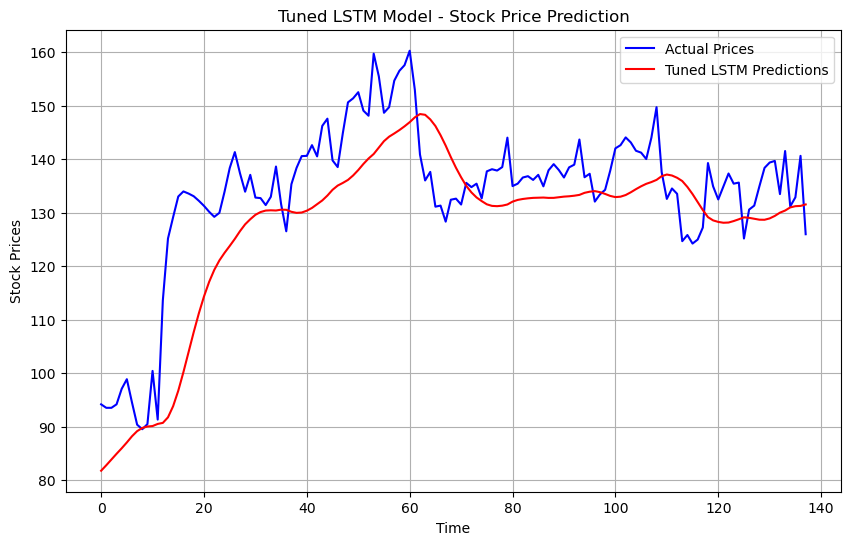

In [157]:
# Step 4: Visualize the results
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predicted_prices_lstm, label='Tuned LSTM Predictions', color='red')
plt.title('Tuned LSTM Model - Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


### Model Comparison and Analysis:

#### 1. **XGBoost**:
- **Best RMSE** (`1.52`), meaning it is the most accurate model out of the ones tested.
- **Reason**: XGBoost is a gradient boosting algorithm, which is well-suited for structured tabular data. It excels in handling multiple features (like `OPEN`, `HIGH`, `LOW`, etc.) and can model complex relationships.
- **Advantage**: XGBoost benefits from the multivariate features we engineered (rolling averages, day of the week, etc.). It uses these features to make more informed predictions, while ARIMA and LSTM were relying more on the `close` price alone.

#### 2. **ARIMA (without tuning)**:
- **Very high RMSE** (`53.45`), showing it’s not suitable for this data.
- **Reason**: ARIMA is a univariate model, meaning it only uses the past values of the `close` price to make predictions. Stock prices are highly volatile and influenced by many factors, and ARIMA cannot account for those external influences.
- **Key Issue**: ARIMA is more suited for stationary data with clear trends or seasonality. The stock prices here likely show non-linear, volatile behavior, making ARIMA less effective.

#### 3. **ARIMA (with Differencing)**:
- **RMSE still high** (`54.47`), showing little to no improvement from the tuned ARIMA.
- **Reason**: Differencing was applied to make the data stationary, but it didn't significantly improve the model’s accuracy. Differencing can help with trends, but the stock prices likely have non-linear and volatile patterns, which ARIMA struggles with.
- **Why No Improvement?**: Even after differencing, the stock market’s inherent volatility and lack of clear trends are likely causing ARIMA to perform poorly.

#### 4. **LSTM (untuned)**:
- **Moderate RMSE** (`9.76`), showing some ability to capture patterns.
- **Reason**: LSTM is designed for sequential data and can capture long-term dependencies. It performs much better than ARIMA because it can learn more complex relationships within the time series data.
- **Why It's Not the Best**: LSTM is not outperforming XGBoost because it is still likely overfitting or underfitting based on its configuration. Additionally, it might not be utilizing the full range of features like XGBoost.

#### 5. **Tuned LSTM**:
- **Worse RMSE** than untuned (`11.40`), which may seem counterintuitive.
- **Possible Reasons**:
   - **Overfitting**: Increasing the number of units and using dropout may have led to overfitting during training. Dropout helps with regularization, but it could have been too aggressive, limiting the model’s ability to learn. The validation loss might not have decreased during tuning.
   - **Complexity vs. Simplicity**: Sometimes, simpler configurations (like the untuned version) perform better because they generalize better. The tuned model might have become too complex, causing it to perform worse on unseen data.
   - **Insufficient Tuning**: While we adjusted some parameters, further fine-tuning or adjustments (e.g., learning rate, number of layers) might have been needed for better performance.

### Summary:
1. **XGBoost** outperforms the other models because it effectively handles the multiple features we engineered and is robust against noisy, non-linear patterns like stock prices. Its RMSE is significantly lower, showing it captures the relationships in the data better.
   
2. **ARIMA** (both tuned and untuned) performs poorly because it is not designed to handle the complex and volatile nature of stock prices. Even with differencing, it can't capture the non-linear relationships that exist.

3. **LSTM** (untuned) performs reasonably well due to its ability to capture long-term dependencies in time-series data. However, LSTM struggles when tuned, possibly due to overfitting or poor tuning choices, resulting in worse performance than the untuned version.

### Recommendations:
- **Stick with XGBoost** for this kind of task, as it is clearly the best-performing model in this scenario.
- **LSTM** could be improved with more extensive hyperparameter tuning, but XGBoost remains a better choice due to its ability to handle multiple features and non-linear relationships.
- **ARIMA** is not suitable for this type of data and should be avoided for stock price predictions.

### 1. Data Preprocessing

In [160]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using Augmented Dickey-Fuller Test
def check_stationarity(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value:.3f}')
    return result[1] > 0.05  # If p-value > 0.05, data is non-stationary

# Select column (adjust based on dataset)
prices = data['close']

# Perform stationarity check
if check_stationarity(prices):
    print("Data is not stationary. Proceeding with differencing.")
    stationary_data = prices.diff().dropna()
else:
    print("Data is already stationary.")
    stationary_data = prices
    

ADF Statistic: -2.5206270134615836
p-value: 0.11053587162880052
Critical Value (1%): -3.439
Critical Value (5%): -2.865
Critical Value (10%): -2.569
Data is not stationary. Proceeding with differencing.


#### Time Scale Explanation


The time scale used in this dataset is **daily** stock prices. 
Since the data is collected at daily intervals, short-term fluctuations will be captured, 
and forecasting models will attempt to predict the stock price for the next day based on historical data.


In [163]:
# Lag Model for feature engineering
def create_lagged_features(data, lag=1):
    df_lagged = pd.DataFrame()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = data.shift(i)
    return df_lagged.dropna()

# Create lagged features with 5-day lag
lagged_data = create_lagged_features(stationary_data, lag=5)
lagged_data.head()

,lag_1,lag_2,lag_3,lag_4,lag_5
6,1.73,-2.77,3.75,-5.58,4.18
7,-3.13,1.73,-2.77,3.75,-5.58
8,11.66,-3.13,1.73,-2.77,3.75
9,-6.68,11.66,-3.13,1.73,-2.77
10,-5.33,-6.68,11.66,-3.13,1.73


### 2. ARIMA Model

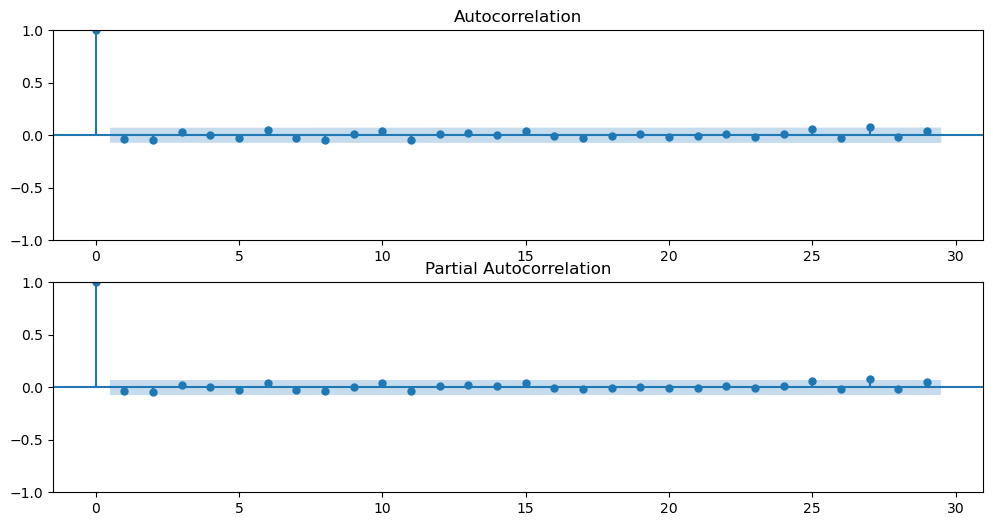

RMSE for ARIMA: 3.3114


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


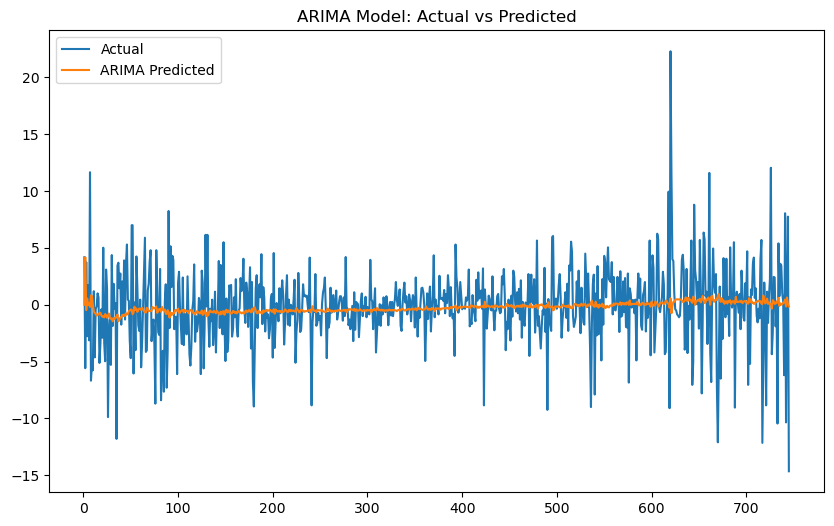

In [165]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(stationary_data, ax=plt.gca())
plt.subplot(212)
plot_pacf(stationary_data, ax=plt.gca())
plt.show()

# Fit ARIMA model (example order can be adjusted)
arima_model = ARIMA(stationary_data, order=(1, 1, 1))
arima_result = arima_model.fit()

# ARIMA predictions and RMSE
pred_arima = arima_result.predict(start=0, end=len(stationary_data)-1)
rmse_arima = np.sqrt(mean_squared_error(stationary_data, pred_arima))
print(f'RMSE for ARIMA: {rmse_arima:.4f}')

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(stationary_data.index, stationary_data, label='Actual')
plt.plot(stationary_data.index, pred_arima, label='ARIMA Predicted')
plt.title("ARIMA Model: Actual vs Predicted")
plt.legend()
plt.show()


### 3. LSTM Model

In [167]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(stationary_data.values, sequence_length)

# Train/test split for LSTM
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile and fit
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# LSTM Predictions
pred_lstm = model.predict(X_test)
rmse_lstm = np.sqrt(mean_squared_error(y_test, pred_lstm))
print(f'RMSE for LSTM: {rmse_lstm:.4f}')


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.8137
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8117
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0490
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.9659
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.3384
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5501
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.7396
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.6029
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5870
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8147
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x33c71f600> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a 

### 4. Random Forest and SVM

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
pred_rf = rf_model.predict(X_test.reshape(X_test.shape[0], -1))
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print(f'RMSE for Random Forest: {rmse_rf:.4f}')

# SVM Model
svm_model = SVR()
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
pred_svm = svm_model.predict(X_test.reshape(X_test.shape[0], -1))
rmse_svm = np.sqrt(mean_squared_error(y_test, pred_svm))
print(f'RMSE for SVM: {rmse_svm:.4f}')

RMSE for Random Forest: 5.0053
RMSE for SVM: 5.0411


### 5. Predictions for Next 10 Days

In [171]:
# ARIMA 10-Day Predictions
future_arima = arima_result.forecast(steps=10)
print("ARIMA 10-Day Predictions:", future_arima)

# LSTM 10-Day Predictions (function to predict future)
def predict_future_lstm(model, last_data_point, num_predictions):
    predictions = []
    for _ in range(num_predictions):
        prediction = model.predict(np.reshape(last_data_point, (1, last_data_point.shape[0], 1)))[0][0]
        predictions.append(prediction)
        last_data_point = np.append(last_data_point[1:], prediction)
    return predictions

lstm_predictions = predict_future_lstm(model, X_test[-1], 10)
print("LSTM 10-Day Predictions:", lstm_predictions)

# Random Forest and SVM can use similar forecasting logic as per their structure.


ARIMA 10-Day Predictions: 745    0.796693
746    0.066694
747    0.101193
748    0.099563
749    0.099640
750    0.099636
751    0.099636
752    0.099636
753    0.099636
754    0.099636
Name: predicted_mean, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
LSTM 10-Day Predictions: [-0.74614745, -0.77890646, -0.790624, -0.7825254, -0.75363946, -0.70747703, -0.64663535, -0.57489306, -0.49653596, -0.41608107]


### 2. ARIMA Model Predictions - Graph

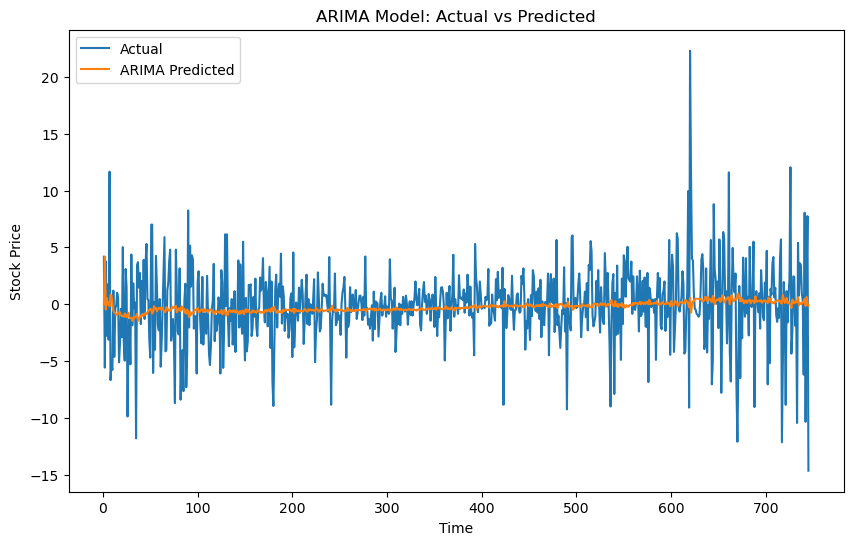

In [174]:

# Plot ARIMA predictions (Actual vs Predicted)
plt.figure(figsize=(10, 6))
plt.plot(stationary_data.index, stationary_data, label='Actual')
plt.plot(stationary_data.index, pred_arima, label='ARIMA Predicted')
plt.title("ARIMA Model: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


### 3. LSTM Model Predictions - Graph

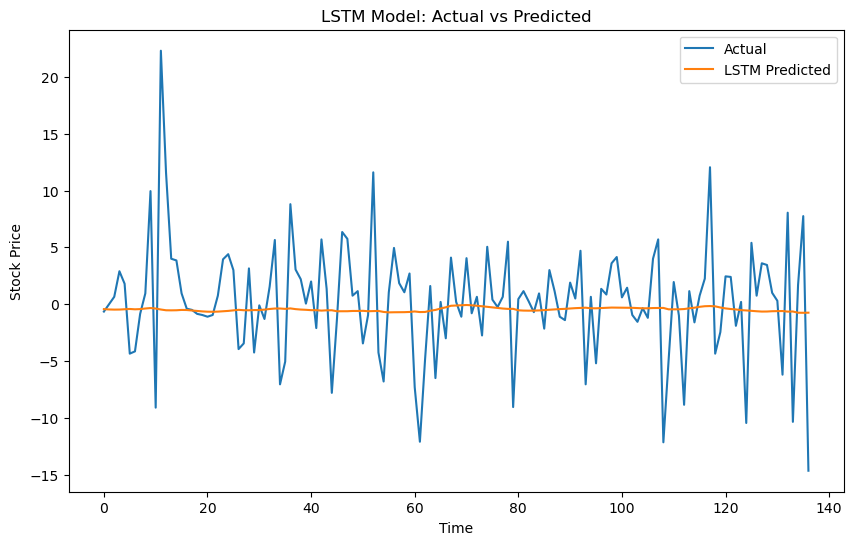

In [182]:

# Plot LSTM predictions (Actual vs Predicted)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(pred_lstm, label='LSTM Predicted')
plt.title("LSTM Model: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


### 4. Random Forest and SVM Model Predictions - Graph

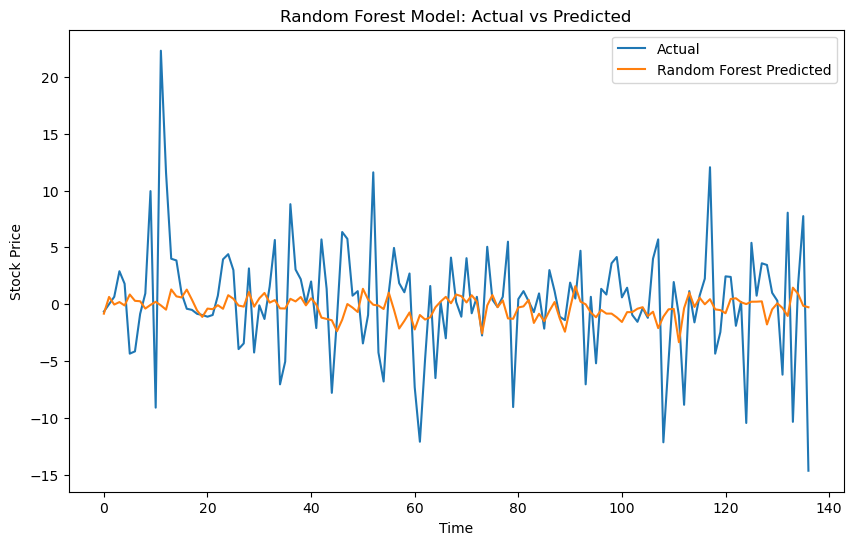

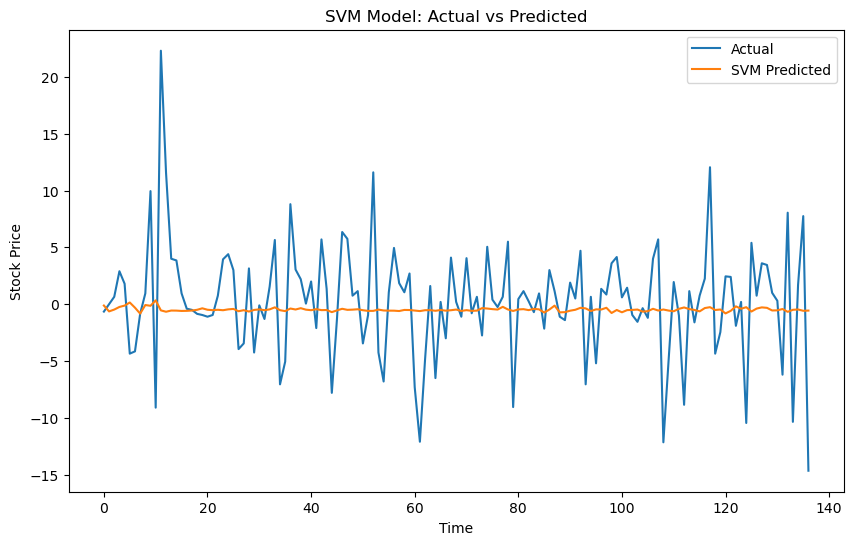

In [186]:

# Plot Random Forest predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(pred_rf, label='Random Forest Predicted')
plt.title("Random Forest Model: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot SVM predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(pred_svm, label='SVM Predicted')
plt.title("SVM Model: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


## 1. Exploratory Data Analysis (EDA)

       Date  series    OPEN    HIGH     LOW   PREV. CLOSE     ltp   close   \
0  25-Jul-24      EQ  221.00  223.97  216.95        223.49  218.95  219.31   
1  24-Jul-24      EQ  217.85  225.50  215.60        217.91  224.25  223.49   
2  23-Jul-24      EQ  222.50  223.72  207.00        221.66  216.70  217.91   
3  22-Jul-24      EQ  214.00  222.19  214.00        218.89  221.30  221.66   
4  19-Jul-24      EQ  217.99  220.49  213.67        220.62  220.05  218.89   

    vwap   52W H   52W L       VOLUME              VALUE  No of trades   
0  220.90   232.0    79.3  2,61,24,437  5,77,09,54,197.65      2,35,501  
1  221.27   232.0    79.3  3,23,58,784  7,16,00,10,235.16      2,39,989  
2  217.29   232.0    79.3  3,65,89,825  7,95,05,30,270.71      2,39,479  
3  220.53   232.0    79.3  3,37,01,488  7,43,23,04,552.57      2,88,204  
4  217.10   232.0    76.5  3,92,57,871  8,52,29,44,421.91      2,77,803  
            OPEN        HIGH         LOW   PREV. CLOSE         ltp   \
count  746.00000

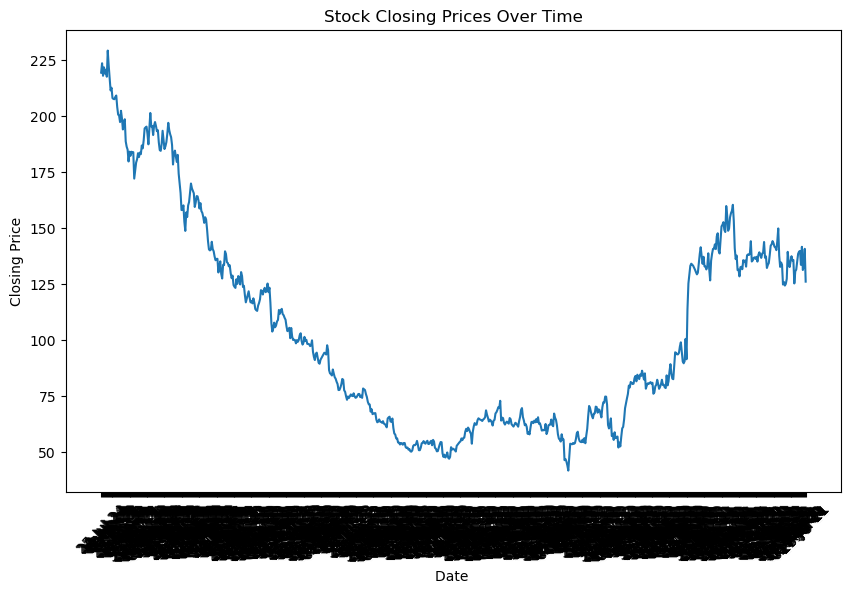

In [194]:
# Perform basic EDA on the dataset to understand its structure and key features
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
zomatodata = pd.read_csv('zomatodata.csv')

# Display first few rows
print(zomatodata.head())

# Statistical summary
print(zomatodata.describe())

# Visualizing the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(zomatodata['Date '], zomatodata['close '])
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date ")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.show()


## 2. Data Preparation: Stationarity and Splitting

In [198]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Function to check for stationarity using ADF test
def check_stationarity(data):
    result = adfuller(data)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.3f}")
    return result[1] > 0.05  # p-value > 0.05 indicates non-stationarity

# Check stationarity for the 'close' price
prices = zomatodata['close ']
if check_stationarity(prices):
    print("Data is not stationary. Differencing the data...")
    stationary_data = prices.diff().dropna()
else:
    print("Data is stationary.")
    stationary_data = prices

# Train-test split (80% train, 20% test)
train_data, test_data = train_test_split(stationary_data, test_size=0.2, shuffle=False)


ADF Statistic: -2.5206270134615836
p-value: 0.11053587162880052
Critical Value (1%): -3.439
Critical Value (5%): -2.865
Critical Value (10%): -2.569
Data is not stationary. Differencing the data...


## 3. Random Forest Model

RMSE for Random Forest: 300.1165


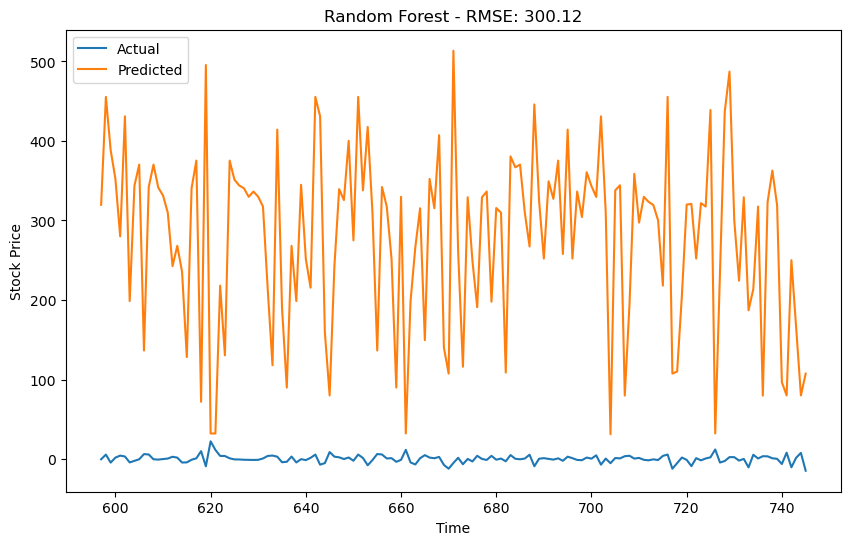

Random Forest Predictions for the next 10 days: [32.18166667 32.18166667 32.18166667 32.18166667 32.18166667 32.18166667
 32.18166667 32.18166667 32.18166667 32.18166667]


In [200]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Build and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10)
rf_model.fit(train_data.values.reshape(-1, 1), train_data.index)

# Predict using Random Forest
pred_rf = rf_model.predict(test_data.values.reshape(-1, 1))

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(test_data, pred_rf))
print(f"RMSE for Random Forest: {rmse_rf:.4f}")

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, pred_rf, label='Predicted')
plt.title("Random Forest - RMSE: {:.2f}".format(rmse_rf))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Predict next 10 days using Random Forest
rf_next_10_days = rf_model.predict(np.arange(len(test_data), len(test_data) + 10).reshape(-1, 1))
print(f"Random Forest Predictions for the next 10 days: {rf_next_10_days}")


Best Hyperparameters for Random Forest: RandomForestRegressor(max_depth=10, n_estimators=50)

## 4. ARIMA Model

RMSE for ARIMA: 4.9020


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


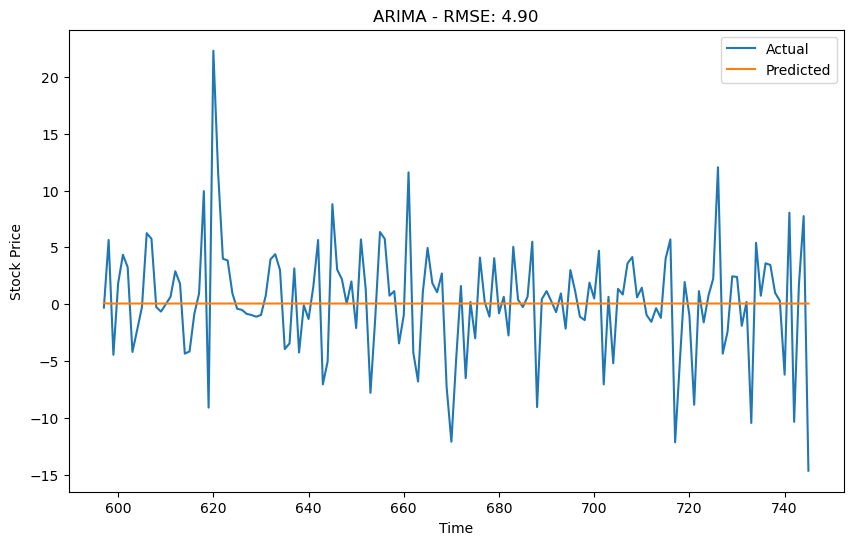

ARIMA Predictions for the next 10 days: 596    0.093375
597    0.058838
598    0.059797
599    0.059770
600    0.059771
601    0.059771
602    0.059771
603    0.059771
604    0.059771
605    0.059771
Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [202]:

from statsmodels.tsa.arima.model import ARIMA

# Build and fit ARIMA model
arima_model = ARIMA(train_data, order=(1, 1, 1))
arima_result = arima_model.fit()

# ARIMA predictions
pred_arima = arima_result.predict(start=len(train_data), end=len(stationary_data)-1)

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(test_data, pred_arima))
print(f"RMSE for ARIMA: {rmse_arima:.4f}")

# Plot actual vs predicted for ARIMA
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, pred_arima, label='Predicted')
plt.title("ARIMA - RMSE: {:.2f}".format(rmse_arima))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Predict next 10 days using ARIMA
arima_next_10_days = arima_result.forecast(steps=10)
print(f"ARIMA Predictions for the next 10 days: {arima_next_10_days}")


## 5. LSTM Model

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.9842
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.1911
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.1577
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.4190
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.3815
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0018
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.3180
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1866
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5469
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2621
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
RMSE for LSTM: 2.9259


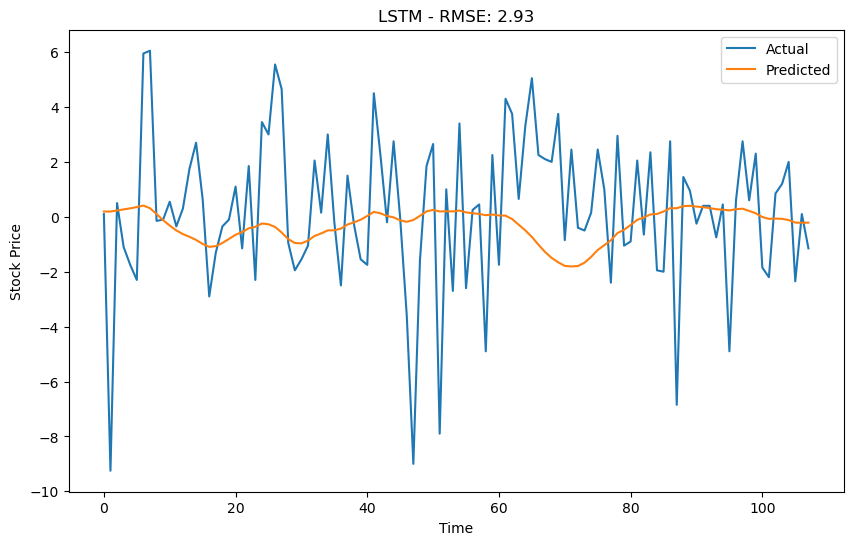

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
LSTM Predictions for the next 10 days: [-0.21306296 -0.21306296 -0.21306296 -0.21306296 -0.21306296 -0.21306296
 -0.21306296 -0.21306296 -0.21306296 -0.21306296]


In [204]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(train_data.values, sequence_length)

# Split for training and testing
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# LSTM predictions
pred_lstm = model.predict(X_test)

# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test, pred_lstm))
print(f"RMSE for LSTM: {rmse_lstm:.4f}")

# Plot actual vs predicted for LSTM
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(pred_lstm, label='Predicted')
plt.title("LSTM - RMSE: {:.2f}".format(rmse_lstm))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Predict next 10 days using LSTM
lstm_next_10_days = model.predict(np.array([X_test[-1]]*10))
print(f"LSTM Predictions for the next 10 days: {lstm_next_10_days.flatten()}")


## 6. SVM Model

RMSE for SVM: 286.8700


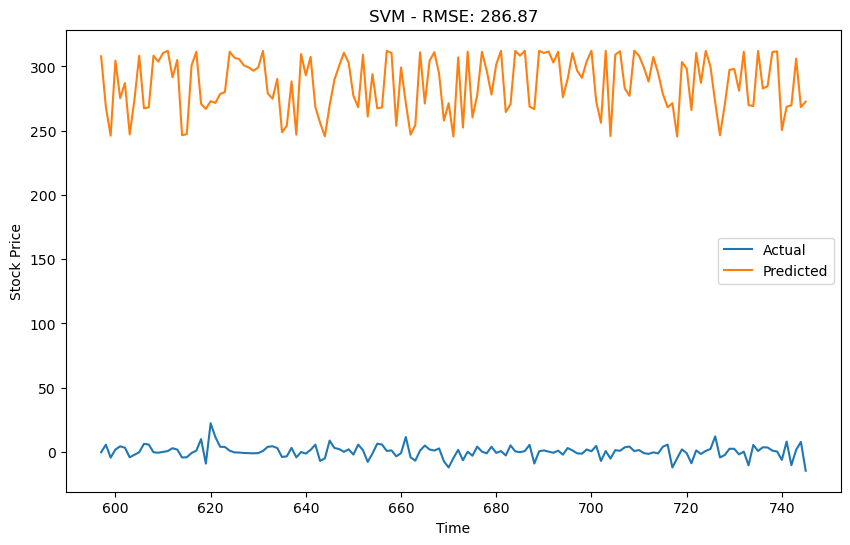

SVM Predictions for the next 10 days: [272.98461438 272.98461438 272.98461438 272.98461438 272.98461438
 272.98461438 272.98461438 272.98461438 272.98461438 272.98461438]


In [206]:

from sklearn.svm import SVR

# Build and train the SVM model
svm_model = SVR()
svm_model.fit(train_data.values.reshape(-1, 1), train_data.index)

# SVM predictions
pred_svm = svm_model.predict(test_data.values.reshape(-1, 1))

# Calculate RMSE for SVM
rmse_svm = np.sqrt(mean_squared_error(test_data, pred_svm))
print(f"RMSE for SVM: {rmse_svm:.4f}")

# Plot actual vs predicted for SVM
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, pred_svm, label='Predicted')
plt.title("SVM - RMSE: {:.2f}".format(rmse_svm))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Predict next 10 days using SVM
svm_next_10_days = svm_model.predict(np.arange(len(test_data), len(test_data) + 10).reshape(-1, 1))
print(f"SVM Predictions for the next 10 days: {svm_next_10_days}")
